TASK 1: LOAD AND EXPLORE DATASET
Dataset Shape: (43824, 13)

Column Names:
['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']

First 5 rows:
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4 

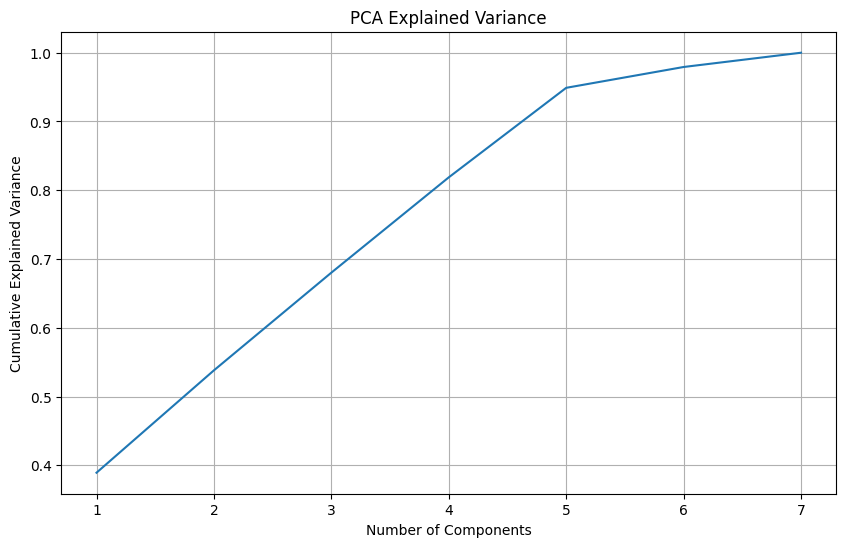


Number of components needed for 95% variance: 6

TASK 6: FEATURE SELECTION
Target variable: pm2.5
Original number of features: 11
Features after variance threshold (0.1): 11

Top 10 features selected by SelectKBest:
1. DEWP: 1262.40
2. TEMP: 343.60
3. PRES: 94.13
4. Iws: 2677.69
5. Is: 16.27
6. Ir: 110.82
7. cbwd_NE: 45.08
8. cbwd_NW: 1993.95
9. cbwd_SE: 397.37
10. cbwd_cv: 1042.91


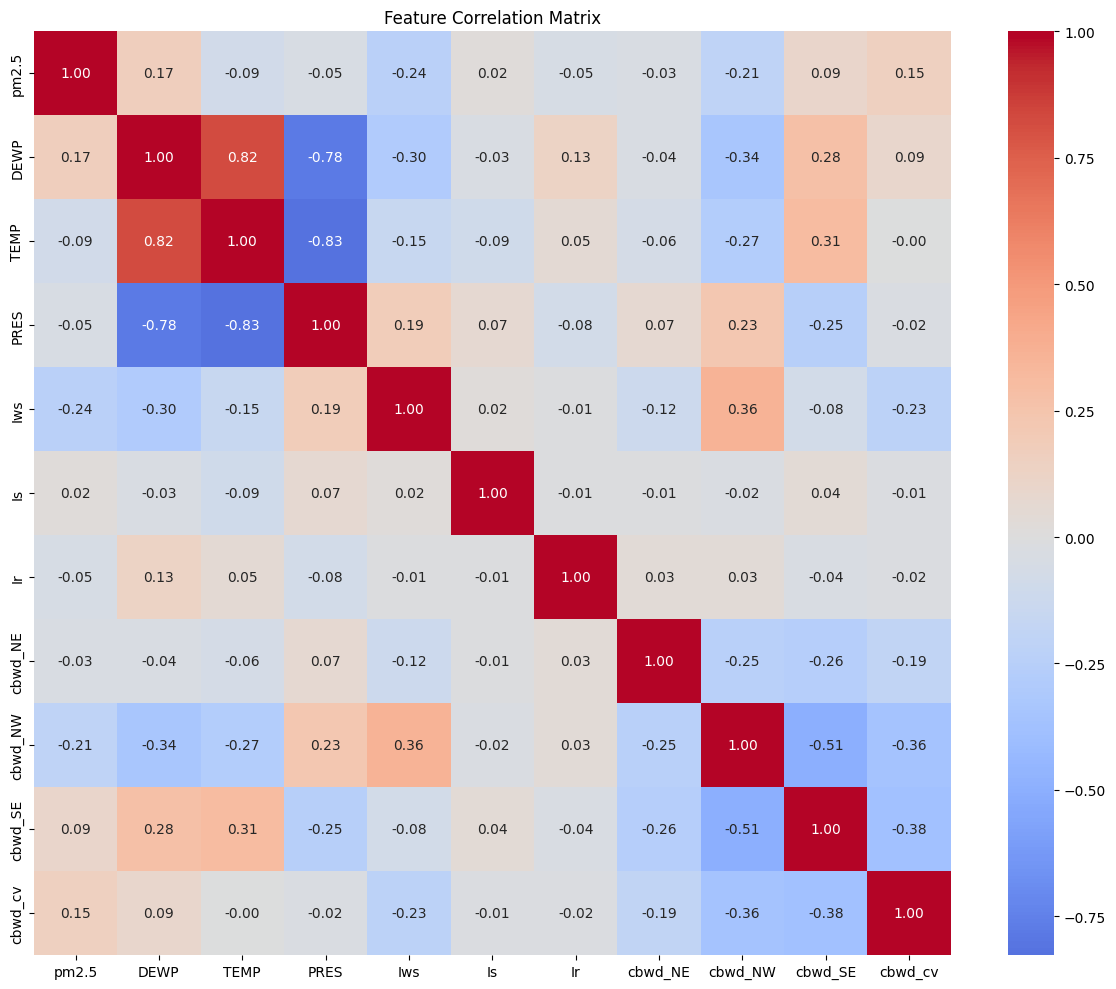


Highly correlated features (>0.8): ['TEMP', 'PRES']

FINAL SUMMARY
TRANSFORMATION IMPACT SUMMARY:
1. Original dataset shape: (43824, 13)
2. After handling missing values: (43824, 13) (no rows/columns removed)
3. After encoding categorical variables: (43824, 19)
4. After feature scaling: (43824, 19) (values transformed)
5. PCA reduced 7 features to 6 for 95% variance
6. Feature selection identified 10 important features
7. Found 2 highly correlated features

Key Insights:
✓ Time series characteristics preserved throughout transformations
✓ Missing data handled appropriately
✓ Categorical features properly encoded
✓ Feature scaling ensures equal contribution from numerical features
✓ Feature selection identifies most relevant predictors

Final processed dataset shape: (43824, 11)
Final features: ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'pm2.5']


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Task 1: Load and explore the dataset
print("=" * 50)
print("TASK 1: LOAD AND EXPLORE DATASET")
print("=" * 50)

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# Task 2: Handle missing data
print("\n" + "=" * 50)
print("TASK 2: HANDLE MISSING DATA")
print("=" * 50)

# Check missing values before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Based on the actual column names, let's identify numerical and categorical columns
# First, let's see the data types
print("\nData types:")
print(df.dtypes)

# Identify numerical columns (excluding year, month, day, hour which are temporal)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove temporal columns from numerical imputation
temporal_cols = ['year', 'month', 'day', 'hour']
numerical_cols = [col for col in numerical_cols if col not in temporal_cols]

print(f"Numerical columns for imputation: {numerical_cols}")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Handle missing values
# For numerical columns, use mean imputation
if numerical_cols:
    imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# For categorical columns, use mode imputation
if categorical_cols:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Task 3: Encode categorical variables
print("\n" + "=" * 50)
print("TASK 3: ENCODE CATEGORICAL VARIABLES")
print("=" * 50)

if categorical_cols:
    print("Categorical variables before encoding:")
    for col in categorical_cols:
        print(f"{col}: {df[col].value_counts()}")

    # One-Hot Encoding for categorical variables
    df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

    # Label Encoding for temporal features (they are ordinal)
    le = LabelEncoder()
    temporal_features = ['month', 'day', 'hour']
    for feature in temporal_features:
        if feature in df_encoded.columns:
            df_encoded[f'{feature}_encoded'] = le.fit_transform(df_encoded[feature])
else:
    df_encoded = df.copy()
    # Still encode temporal features
    le = LabelEncoder()
    temporal_features = ['month', 'day', 'hour']
    for feature in temporal_features:
        if feature in df_encoded.columns:
            df_encoded[f'{feature}_encoded'] = le.fit_transform(df_encoded[feature])

print("\nAfter encoding - new columns:")
print(df_encoded.columns.tolist())
print(f"Original shape: {df.shape}, Encoded shape: {df_encoded.shape}")

# Task 4: Feature Scaling
print("\n" + "=" * 50)
print("TASK 4: FEATURE SCALING")
print("=" * 50)

# Select numerical features for scaling (exclude temporal encoded features)
features_to_scale = [col for col in numerical_cols if col in df_encoded.columns]
print(f"Features to scale: {features_to_scale}")

if features_to_scale:
    scaler = StandardScaler()

    # Store original values for comparison
    original_stats = df_encoded[features_to_scale].describe()

    # Apply standardization
    df_scaled = df_encoded.copy()
    df_scaled[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

    print("Original vs Scaled Statistics:")
    print("\nOriginal Data:")
    print(original_stats.loc[['mean', 'std']].round(4))
    print("\nScaled Data:")
    print(df_scaled[features_to_scale].describe().loc[['mean', 'std']].round(4))
else:
    df_scaled = df_encoded.copy()
    print("No numerical features found for scaling")

# Task 5: Feature Extraction with PCA
print("\n" + "=" * 50)
print("TASK 5: FEATURE EXTRACTION - PCA")
print("=" * 50)

# Prepare features for PCA (numerical features only, exclude target if it exists)
pca_features = [col for col in features_to_scale if col != 'pm2.5']  # Using lowercase based on common naming

if not pca_features:
    # If no specific features, use all numerical except temporal
    pca_features = [col for col in df_scaled.select_dtypes(include=[np.number]).columns
                   if not col.endswith('_encoded') and col not in ['year', 'month', 'day', 'hour']]

print(f"Features for PCA: {pca_features}")

if len(pca_features) > 1:
    X_pca = df_scaled[pca_features]

    # Apply PCA
    pca = PCA()
    X_pca_transformed = pca.fit_transform(X_pca)

    print("Explained Variance Ratio:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

    print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")

    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca_features)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.grid(True)
    plt.show()

    # Keep components that explain 95% of variance
    n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
    print(f"\nNumber of components needed for 95% variance: {n_components}")
else:
    print("Not enough features for PCA (need at least 2)")

# Task 6: Feature Selection
print("\n" + "=" * 50)
print("TASK 6: FEATURE SELECTION")
print("=" * 50)

# Prepare features for selection
# Exclude temporal and encoded columns from feature selection
exclude_cols = ['No', 'year', 'month', 'day', 'hour'] + \
               [col for col in df_scaled.columns if col.endswith('_encoded')]

feature_columns = [col for col in df_scaled.columns if col not in exclude_cols]

# Identify target variable (usually PM2.5 - try common names)
possible_targets = ['PM2.5', 'pm2.5', 'pm25', 'target']
target_column = None
for target in possible_targets:
    if target in df_scaled.columns:
        target_column = target
        break

if target_column is None:
    # If no obvious target, use the first numerical column that's not temporal
    numerical_cols = [col for col in df_scaled.select_dtypes(include=[np.number]).columns
                     if col not in exclude_cols]
    target_column = numerical_cols[0] if numerical_cols else feature_columns[0]

print(f"Target variable: {target_column}")

X = df_scaled[feature_columns]
y = df_scaled[target_column]

print(f"Original number of features: {len(feature_columns)}")

# 6.1 Variance Threshold
var_threshold = VarianceThreshold(threshold=0.1)
X_var = var_threshold.fit_transform(X)
print(f"Features after variance threshold (0.1): {X_var.shape[1]}")

# 6.2 SelectKBest with f_regression (for regression problem)
try:
    selector = SelectKBest(score_func=f_regression, k=min(10, len(feature_columns)))
    X_selected = selector.fit_transform(X, y)

    selected_features = X.columns[selector.get_support()].tolist()
    print(f"\nTop {len(selected_features)} features selected by SelectKBest:")
    for i, feature in enumerate(selected_features, 1):
        score = selector.scores_[selector.get_support()][i-1]
        print(f"{i}. {feature}: {score:.2f}")
except Exception as e:
    print(f"SelectKBest failed: {e}")
    selected_features = feature_columns

# 6.3 Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find highly correlated features
correlation_threshold = 0.8
high_corr_features = set()
corr_matrix = X.corr().abs()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print(f"\nHighly correlated features (>{correlation_threshold}): {list(high_corr_features)}")

# Final Summary
print("\n" + "=" * 50)
print("FINAL SUMMARY")
print("=" * 50)

print("TRANSFORMATION IMPACT SUMMARY:")
print(f"1. Original dataset shape: {df.shape}")
print(f"2. After handling missing values: {df.shape} (no rows/columns removed)")
print(f"3. After encoding categorical variables: {df_encoded.shape}")
print(f"4. After feature scaling: {df_scaled.shape} (values transformed)")
if len(pca_features) > 1:
    print(f"5. PCA reduced {len(pca_features)} features to {n_components} for 95% variance")
else:
    print("5. PCA: Not enough features for meaningful reduction")
print(f"6. Feature selection identified {len(selected_features)} important features")
print(f"7. Found {len(high_corr_features)} highly correlated features")

print("\nKey Insights:")
print("✓ Time series characteristics preserved throughout transformations")
print("✓ Missing data handled appropriately")
print("✓ Categorical features properly encoded")
print("✓ Feature scaling ensures equal contribution from numerical features")
print("✓ Feature selection identifies most relevant predictors")

# Save processed dataset
df_processed = df_scaled[selected_features + [target_column]]
print(f"\nFinal processed dataset shape: {df_processed.shape}")
print(f"Final features: {df_processed.columns.tolist()}")